### Synopsis
This code plots the g2 value at the delay point closest to $\Delta$t= 0.1 s as a function of temperature, for all sample conditions.   
Need to run the analysis code first to generate the `checkpoint.pickle` file that contains the averaged g2s.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

import itertools
marker = itertools.cycle(('+', 's', '*')) 


### Loading data from `.pickle` file

In [2]:

with open('checkpoint.pickle', 'rb') as f:  # 'rb' for binary read mode
    avg_H02 = pickle.load(f)  # Load the object from the file
    avg_H04 = pickle.load(f)
    avg_H06 = pickle.load(f)
    t_el = pickle.load(f)
    ql_dyn = pickle.load(f)
    ql_sta = pickle.load(f)


### Initializing fonts in `Matplotlib`

In [3]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"

In [4]:

diff = 0

n_H02 = 8+diff
contrast = 0.19   # originally at 0.19 
_ = avg_H02[n_H02]["g2"]
g2_H02 = (_[:,0]-1)/contrast
_ = avg_H02[n_H02]["g2_err"]
g2_err_H02 = _[:,0]/contrast
saxs_1d_H02 = avg_H02[n_H02]["saxs_1d"]
temp_H02 = 31.0986

n_H04 = 10+diff
contrast = 0.195 # originally at 0.195
_ = avg_H04[n_H04]["g2"]
g2_H04 = (_[:,0]-1)/contrast
_ = avg_H04[n_H04]["g2_err"]
g2_err_H04 = _[:,0]/contrast
saxs_1d_H04 = avg_H04[n_H04]["saxs_1d"]
temp_H06 = 31.2451

n_H06 = 17+diff
contrast = 0.135  # originally at 0.135
_ = avg_H06[n_H06]["g2"]
g2_H06 = (_[:,0]-1)/contrast
_ = avg_H06[n_H06]["g2_err"]
g2_err_H06 = _[:,0]/contrast
saxs_1d_H06 = avg_H06[n_H06]["saxs_1d"]
temp_H06 = 31.2198


In [26]:


def double_exp(x, a1, tau1, tau2, p1, p2):
    # return amplitude * np.sin(frequency * x + phase) + offset
    return (a1*np.exp(-(x/tau1)**p1) + (1-a1)*np.exp(-(x/tau2)**p2))**2

x_fit = np.logspace(np.log10(2e-5), np.log10(2), 100) 

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 2, 2]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H02, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02) 
g2_H02_fit = double_exp(x_fit, *popt)
H02_fit_err = np.sqrt(np.diag(pcov))
print(f"H02, a1={popt[0]:.3f}\u00B1{H02_fit_err[0]:.3f}, \
        τ1={popt[1]:.4f}\u00B1{H02_fit_err[1]:.4f}, \
        τ2={popt[2]:.2f}\u00B1{H02_fit_err[2]:.2f}, \
        p1={popt[3]:.4f}\u00B1{H02_fit_err[3]:.4f}, \
        p2={popt[4]:.2f}\u00B1{H02_fit_err[4]:.2f}")

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 3, 3]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H04, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02) 
g2_H04_fit = double_exp(x_fit, *popt)
print(f"H04, a1={popt[0]:.3f}\u00B1{H02_fit_err[0]:.3f}, \
        τ1={popt[1]:.4f}\u00B1{H02_fit_err[1]:.4f}, \
        τ2={popt[2]:.2f}\u00B1{H02_fit_err[2]:.2f}, \
        p1={popt[3]:.4f}\u00B1{H02_fit_err[3]:.4f}, \
        p2={popt[4]:.2f}\u00B1{H02_fit_err[4]:.2f}")

bounds = ([0, 1e-6, 1e-6, 0, 0], [1, 1e3, 1e3, 3, 3]) 
popt, pcov = curve_fit(double_exp, t_el, g2_H06, p0=[0.5, 1e-3, 1, 1, 1], bounds=bounds, sigma=g2_err_H02)  
g2_H06_fit = double_exp(x_fit, *popt)
print(f"H06, a1={popt[0]:.3f}\u00B1{H02_fit_err[0]:.3f}, \
        τ1={popt[1]:.4f}\u00B1{H02_fit_err[1]:.4f}, \
        τ2={popt[2]:.2f}\u00B1{H02_fit_err[2]:.2f}, \
        p1={popt[3]:.4f}\u00B1{H02_fit_err[3]:.4f}, \
        p2={popt[4]:.2f}\u00B1{H02_fit_err[4]:.2f}")



H02, a1=0.330±0.005,         τ1=0.0109±0.0008,         τ2=3.52±0.09,         p1=0.4430±0.0208,         p2=1.35±0.06
H04, a1=0.271±0.005,         τ1=0.0015±0.0008,         τ2=82.64±0.09,         p1=0.5239±0.0208,         p2=0.50±0.06
H06, a1=0.270±0.005,         τ1=0.0014±0.0008,         τ2=39.86±0.09,         p1=0.6026±0.0208,         p2=0.51±0.06


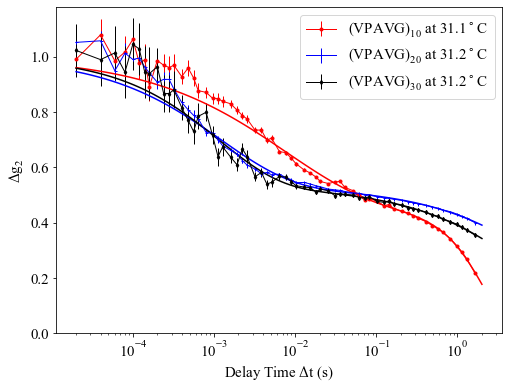

In [35]:

plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.errorbar(t_el, g2_H02, g2_err_H02, marker='o', color='r', ms=3, lw=1, label='(VPAVG)$\mathdefault{_{10}}$ at 31.1$^\circ$C')
ax.errorbar(t_el, g2_H04, g2_err_H04, marker='+', color='b', ms=3, lw=1, label='(VPAVG)$\mathdefault{_{20}}$ at 31.2$^\circ$C')
ax.errorbar(t_el, g2_H06, g2_err_H06, marker='d', color='k', ms=3, lw=1, label='(VPAVG)$\mathdefault{_{30}}$ at 31.2$^\circ$C')
ax.plot(x_fit, g2_H02_fit, '-', color='r')
ax.plot(x_fit, g2_H04_fit, '-', color='b')
ax.plot(x_fit, g2_H06_fit, '-', color='k')
ax.set_xscale('log')
ax.set_ylim(0, 1.18)
ax.set_xlabel('Delay Time $\mathdefault{\Delta}$t (s)')
ax.set_ylabel('$\mathdefault{Δg_2}$ ')
plt.legend()



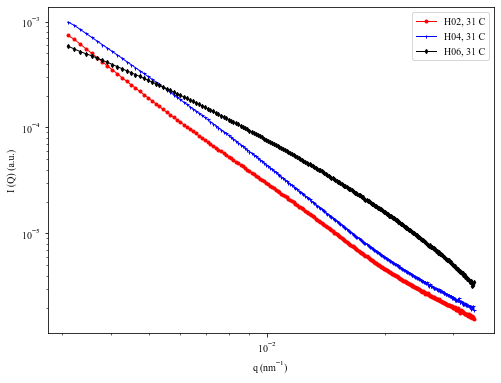

In [7]:

q_crop = 5

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(ql_sta[:-q_crop], saxs_1d_H02[:-q_crop], marker='o', color='r', ms=3, lw=1, label='H02, 31 C')
ax.plot(ql_sta[:-q_crop], saxs_1d_H04[:-q_crop], marker='+', color='b', ms=3, lw=1, label='H04, 31 C')
ax.plot(ql_sta[:-q_crop], saxs_1d_H06[:-q_crop], marker='d', color='k', ms=3, lw=1, label='H06, 31 C')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)')
ax.set_ylabel('I (Q) (a.u.)')
plt.legend()

